In [3]:
import numpy as np
#import 
import pylab as plt
import random

## Monte Carlo integration

You might have seen this already, but Monte Carlo integration is an absolute crucial notion in modern statistics (modern because it relies on generating a large number of data points, which has been made possible by computers). Suppose you have very a complicated integral to solve and that you can write down the integrand as a product of $f(x)$ and $p(x)$ with $\int p(x)=1$ (this is not restrictive at all! See below). My nasty integral is

$$\int f(x) p(x) dx$$


Provided one can **evaluate** $f(x)$ and **sample** $p(x)$, then


$$\int f(x) p(x) dx \approx \frac{1}{N}\sum_{i=1}^N f(x_i) $$

where $x_i$ are samples drawn from $p$. 








### Exercise

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

### Solution

$$ I = \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = \sqrt{2 \pi \sigma^2} \int_0^\infty x^3 \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{x^2}{2\sigma^2}\right)dx = \sqrt{2 \pi \sigma^2} \int_0^\infty x^3 n(x) dx $$

$$\int_{-\infty}^\infty n(x) dx = 1$$

I will use gaussian function to sample. The only problem is that doing so I will include negative numbers as well. I will tranform them in positive numbers by using np.abs, and I will devide by 2. 

In [33]:
def fun(x):
    return x**3
sigma = 1
norm=2/(np.sqrt((2*np.pi*sigma**2)))

#this function evaluates N_trials time the integral, each time by sampling N_sample points



def integral_by_monteCarlo(N_trials, N_sample):
    I = []
    for i in range(N_trials):
        fx = []
        for j in range(N_sample):
            fx.append(fun(abs(random.gauss(0,sigma)))/norm) #loop for single integral
        I.append(np.mean(fx)) #loop for many integrals
    return I

How does the integral converges to the result with the number of samples?

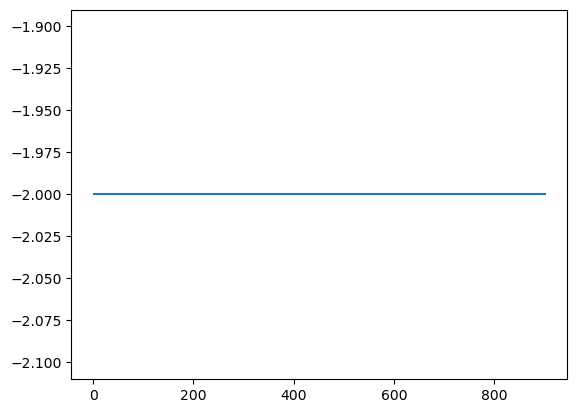

In [49]:
N_sample = np.arange(1,1001,100)
I=[]
for n in N_sample:
    I.append(-2)
    #I.append(integral_by_monteCarlo(1,n)-2)
    
plt.plot(N_sample, I)    


(array([ 8.,  5., 15., 15., 22., 24.,  2.,  4.,  2.,  3.]),
 array([1.70674551, 1.77540853, 1.84407156, 1.91273458, 1.98139761,
        2.05006063, 2.11872365, 2.18738668, 2.2560497 , 2.32471273,
        2.39337575]),
 <BarContainer object of 10 artists>)

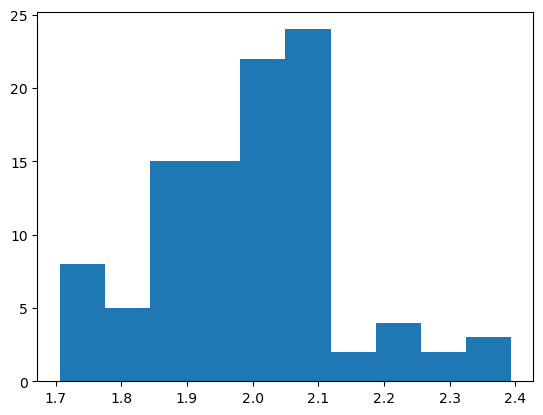

In [29]:
N=10
plt.hist(integral_by_monteCarlo(100,N))

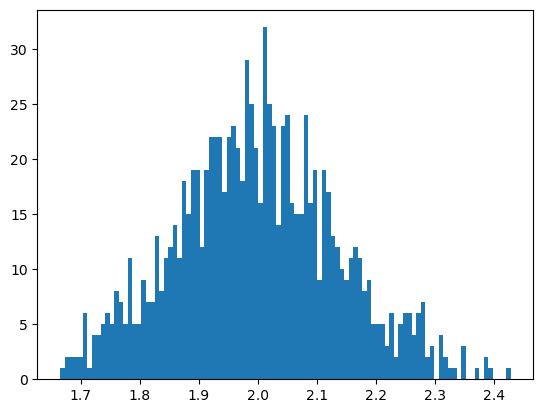

In [32]:
plt.hist(integral_by_monteCarlo(1000,N),100)
plt.show()

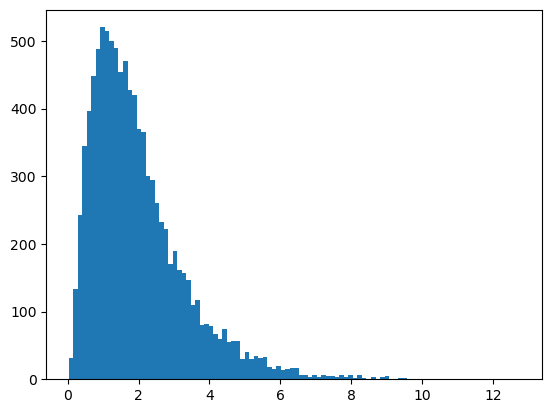

In [28]:
plt.hist(integral_by_monteCarlo(10000,N),100)
plt.show()